
# Telecom Customer Churn Prediction

### Machine Learning Classification Project

This notebook builds a Customer Churn prediction model using the Telecom Customer Churn dataset.
The goal is to predict whether a customer will churn (Yes/No).


## Import Libraries

In [1]:
# ===============================
# IMPORT REQUIRED LIBRARIES
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

import warnings
warnings.filterwarnings("ignore")


## Load Dataset

In [2]:
# ===============================
# LOAD DATASET WITH ERROR HANDLING
# ===============================

file_path = "telecom_churn.csv"

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.\n")

except FileNotFoundError as e:
    print(e)

except Exception as e:
    print(f"❌ Error: The file '{file_path}' was not found.")
    print("Please ensure the dataset is in the same directory as this notebook.")


Dataset loaded successfully.



## Basic Exploration

In [3]:
# ===============================
# BASIC DATA EXPLORATION
# ===============================

print("First 5 Rows:")
display(df.head())

print("\nDataset Shape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values Summary:")
print(df.isnull().sum())


First 5 Rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



Dataset Shape:
(7043, 21)

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values Summary:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Con

## Identify Target Column Automatically

In [4]:
# ===============================
# AUTOMATIC TARGET IDENTIFICATION
# ===============================

possible_targets = [col for col in df.columns if "churn" in col.lower()]

if len(possible_targets) == 0:
    raise ValueError("No target column containing 'churn' found.")

target_column = possible_targets[0]
print(f"Detected Target Column: {target_column}")

print("\nClass Distribution:")
print(df[target_column].value_counts())

# Display class ratio (imbalance check)
class_ratio = df[target_column].value_counts(normalize=True)
print("\nClass Ratio:")
print(class_ratio)


Detected Target Column: Churn

Class Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Class Ratio:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


## Data Cleaning & Preprocessing

In [5]:
# ===============================
# DATA CLEANING & PREPROCESSING
# ===============================

# Copy dataset
data = df.copy()

# Handle missing values
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

# Convert Yes/No target to binary
if data[target_column].dtype == "object":
    data[target_column] = data[target_column].str.strip().str.lower()
    data[target_column] = data[target_column].map({"yes": 1, "no": 0})

# Ensure target is numeric
if data[target_column].isnull().any():
    raise ValueError("Target column contains unmapped values after encoding.")

# Separate features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Encode categorical variables dynamically
categorical_cols = X.select_dtypes(include=["object"]).columns

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Preprocessing completed.")
print("Feature matrix shape:", X_encoded.shape)


Preprocessing completed.
Feature matrix shape: (7043, 13601)


## Train Test Split

In [6]:
# ===============================
# TRAIN TEST SPLIT
# ===============================

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 5634
Testing samples: 1409


##Model Training (Logistic Regression)

In [8]:
# ===============================
# MODEL TRAINING
# ===============================

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


##Model Evaluation

In [9]:
# ===============================
# MODEL EVALUATION
# ===============================

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.794889992902768
Precision: 0.6340694006309149
Recall: 0.5374331550802139
F1-Score: 0.5817655571635311

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



##Confusion Matrix Visualization

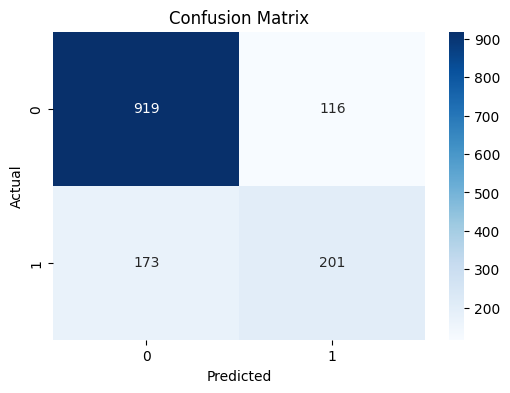

In [10]:
# ===============================
# CONFUSION MATRIX
# ===============================

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##Sample Predictions vs Actual

In [11]:
# ===============================
# SAMPLE PREDICTIONS
# ===============================

comparison = pd.DataFrame({
    "Actual": y_test.values[:10],
    "Predicted": y_pred[:10]
})

comparison


,Actual,Predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,1,0


# Model Evaluation Discussion

---


##which metric is most important for churn prediction and why?

In churn prediction, **Recall** is often more important than Accuracy. Accuracy can be misleading when classes are imbalanced. For example, if only 20% of customers churn, a model that predicts “No churn” for everyone would still achieve 80% accuracy — but it would completely fail to detect customers who are about to leave.

Recall measures how many actual churners we correctly identify. In a telecom business context, failing to identify a churner means losing a customer and future revenue. Therefore, maximizing Recall helps the company proactively target at-risk customers with retention offers.

However, Precision is also important. If Precision is too low, the company may spend resources targeting customers who would not have churned anyway. Ideally, businesses aim for a balance using the F1-score, but in most churn scenarios, Recall is slightly more critical than raw Accuracy.
